In [4]:
!pip install transformers

Error processing line 1 of /home/dibyalipsa/miniconda3/envs/sentinel/lib/python3.9/site-packages/distutils-precedence.pth:

  Traceback (most recent call last):
    File "/home/dibyalipsa/miniconda3/envs/sentinel/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 47.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.4/773.4 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 58.5 MB/s eta 0:00:00a 0:00:01


In [5]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

/home/dibyalipsa/miniconda3/envs/sentinel/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dibyalipsa/miniconda3/envs/sentinel/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [6]:
import cv2
from PIL import Image
import numpy as np

image=cv2.imread("/home/dibyalipsa/project/Zero_shot_detection/res/test.png")

image= Image.fromarray(np.uint8(image)).convert("RGB")

In [7]:
prompts = ["products in small shelves"]
import torch

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")
# predict
with torch.no_grad():
  outputs = model(**inputs)
preds = outputs.logits.unsqueeze(1)


Unused or unrecognized kwargs: padding.


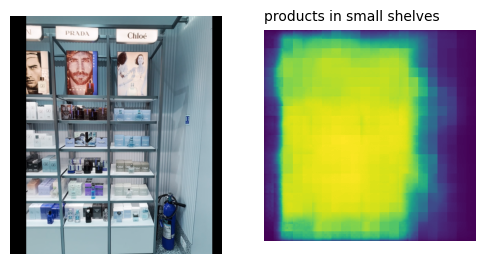

In [8]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, len(prompts) + 1, figsize=(3*(len(prompts) + 1), 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))];
[ax[i+1].text(0, -15, prompt) for i, prompt in enumerate(prompts)];


In [9]:
from transformers import pipeline

checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [11]:
!pip install scikit-image

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Error processing line 1 of /home/dibyalipsa/miniconda3/envs/sentinel/lib/python3.9/site-packages/distutils-precedence.pth:

  Traceback (most recent call last):
    File "/home/dibyalipsa/miniconda3/envs/sentinel/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 65.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 40.9 MB/s eta 0:00:00


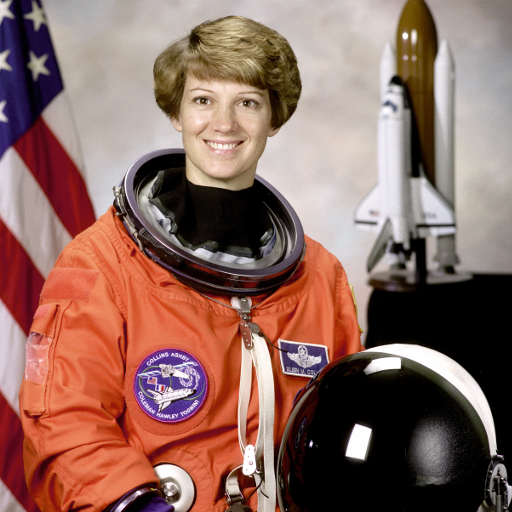

In [12]:
import skimage
import numpy as np
from PIL import Image

image = skimage.data.astronaut()
image = Image.fromarray(np.uint8(image)).convert("RGB")

image

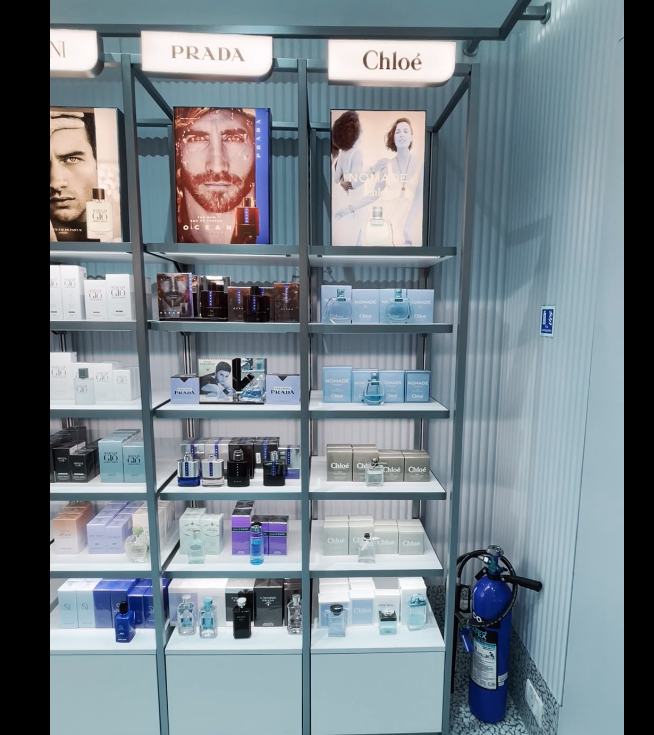

In [13]:
image2=cv2.imread("/home/dibyalipsa/project/Zero_shot_detection/res/test.png")
image2 = Image.fromarray(np.uint8(image2)).convert("RGB")
image2

In [14]:
predictions = detector(
    image,
    candidate_labels=["human face", "rocket", "nasa badge", "star-spangled banner"],
)
predictions

[{'score': 0.6007436513900757,
  'label': 'nasa badge',
  'box': {'xmin': 132, 'ymin': 348, 'xmax': 208, 'ymax': 423}},
 {'score': 0.51260906457901,
  'label': 'nasa badge',
  'box': {'xmin': 278, 'ymin': 339, 'xmax': 329, 'ymax': 378}},
 {'score': 0.45199453830718994,
  'label': 'star-spangled banner',
  'box': {'xmin': 1, 'ymin': -1, 'xmax': 99, 'ymax': 505}},
 {'score': 0.29185545444488525,
  'label': 'rocket',
  'box': {'xmin': 352, 'ymin': 26, 'xmax': 465, 'ymax': 288}},
 {'score': 0.22525441646575928,
  'label': 'rocket',
  'box': {'xmin': 429, 'ymin': 40, 'xmax': 458, 'ymax': 260}},
 {'score': 0.20959880948066711,
  'label': 'star-spangled banner',
  'box': {'xmin': 7, 'ymin': 0, 'xmax': 512, 'ymax': 506}},
 {'score': 0.20486561954021454,
  'label': 'nasa badge',
  'box': {'xmin': 23, 'ymin': 330, 'xmax': 52, 'ymax': 384}},
 {'score': 0.1957520991563797,
  'label': 'rocket',
  'box': {'xmin': 395, 'ymin': -1, 'xmax': 438, 'ymax': 184}},
 {'score': 0.18186010420322418,
  'label':

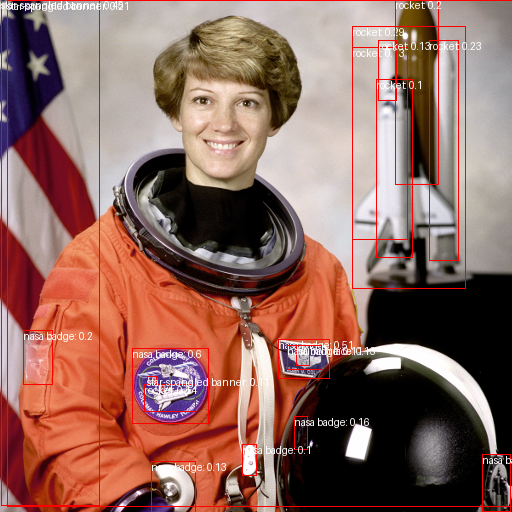

In [15]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image

In [27]:
predictions = detector(
    image2,
    candidate_labels=["small boxes on shelves written chloe"],
)
predictions

[{'score': 0.2546178996562958,
  'label': 'small boxes on shelves written chloe',
  'box': {'xmin': 43, 'ymin': 266, 'xmax': 117, 'ymax': 320}},
 {'score': 0.23818786442279816,
  'label': 'small boxes on shelves written chloe',
  'box': {'xmin': 291, 'ymin': 285, 'xmax': 382, 'ymax': 326}},
 {'score': 0.22027327120304108,
  'label': 'small boxes on shelves written chloe',
  'box': {'xmin': 53, 'ymin': 268, 'xmax': 74, 'ymax': 319}},
 {'score': 0.21356557309627533,
  'label': 'small boxes on shelves written chloe',
  'box': {'xmin': 290, 'ymin': 442, 'xmax': 370, 'ymax': 478}},
 {'score': 0.19715730845928192,
  'label': 'small boxes on shelves written chloe',
  'box': {'xmin': 44, 'ymin': 267, 'xmax': 59, 'ymax': 319}},
 {'score': 0.1962524652481079,
  'label': 'small boxes on shelves written chloe',
  'box': {'xmin': 45, 'ymin': 504, 'xmax': 86, 'ymax': 552}},
 {'score': 0.1942632496356964,
  'label': 'small boxes on shelves written chloe',
  'box': {'xmin': 74, 'ymin': 274, 'xmax': 96

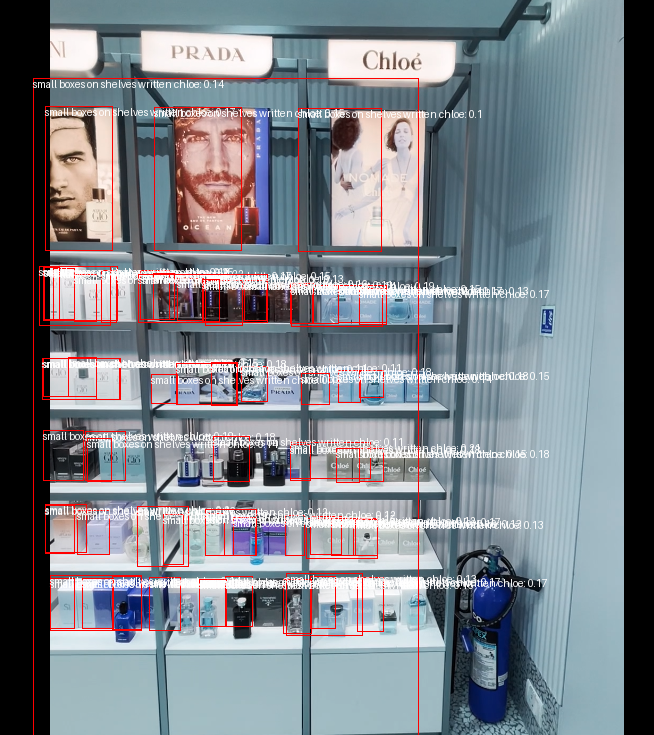

In [28]:
from PIL import ImageDraw
image2=cv2.imread("/home/dibyalipsa/project/Zero_shot_detection/res/test.png")
image2 = Image.fromarray(np.uint8(image2)).convert("RGB")

draw = ImageDraw.Draw(image2)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image2

In [33]:
image2=cv2.imread("/home/dibyalipsa/project/Zero_shot_detection/res/test.png")
image2 = Image.fromarray(np.uint8(image2)).convert("RGB")
image_target = image2

imageq=cv2.imread("/home/dibyalipsa/project/Zero_shot_detection/res/testchloe.png")
imageq = Image.fromarray(np.uint8(image2)).convert("RGB")
query_image = imageq

In [30]:
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

model = AutoModelForZeroShotObjectDetection.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

In [34]:
inputs = processor(images=image_target, query_images=query_image, return_tensors="pt")

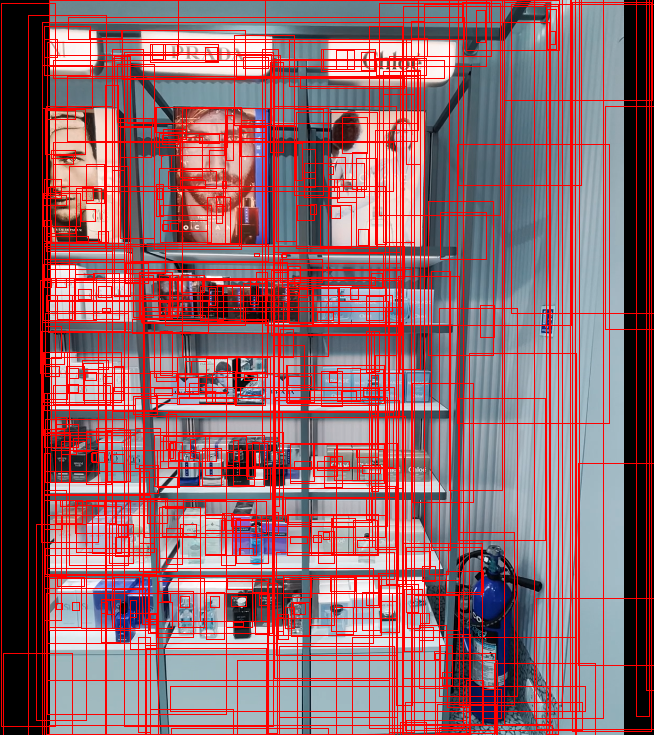

In [35]:
with torch.no_grad():
    outputs = model.image_guided_detection(**inputs)
    target_sizes = torch.tensor([image_target.size[::-1]])
    results = processor.post_process_image_guided_detection(outputs=outputs, target_sizes=target_sizes)[0]
image_target = image2
draw = ImageDraw.Draw(image_target)

scores = results["scores"].tolist()
boxes = results["boxes"].tolist()
labels = results["labels"]

for box, score in zip(boxes, scores):
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)

image_target